# Descriptive Statistics

### Imporst pandas and pokemon dataset

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pokemon = pd.read_csv("pokemon.csv", index_col=0)

In [13]:
pokemon.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [19]:
pokemon.tail(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [28]:
nominal_cols = ["Type 1", "Type 2", "Name"]
ordinal_cols = ["Generation", "Legendary"]
metric_cols = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

In [29]:
pokemon["Generation"].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [30]:
pokemon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [31]:
! pip install scipy
    
    

In [32]:
from scipy import stats

### Finding the mode of each column:

In [35]:
mode_dic = {}
for c in metric_cols:
    mode = stats.mode(pokemon[c])
    mode_dic[c] = mode

mode_dic = pd.DataFrame(mode_dic)

print(mode_dic)

   Total    HP Attack Defense Sp. Atk Sp. Def Speed
0  [600]  [60]  [100]    [70]    [60]    [80]  [50]
1   [37]  [67]   [40]    [54]    [51]    [52]  [46]


An Alternative way to obtain mode of each column:

In [66]:
mode = pokemon[metric_cols].apply(stats.mode)
print(mode)

Total      ([600], [37])
HP          ([60], [67])
Attack     ([100], [40])
Defense     ([70], [54])
Sp. Atk     ([60], [51])
Sp. Def     ([80], [52])
Speed       ([50], [46])
dtype: object


### Finding the geometric mean of each column:

In [65]:
geo_mean= pokemon[metric_cols].apply(stats.gmean)
print(geo_mean)

Total      417.780824
HP          64.776046
Attack      71.802794
Defense     67.520461
Sp. Atk     65.505432
Sp. Def     66.639313
Speed       61.341014
dtype: float64


### Findind standard deviation of each column:

In [43]:
import numpy as np
std = pokemon[metric_cols].apply(np.std)

Total      119.888039
HP          25.518705
Attack      32.437074
Defense     31.164005
Sp. Atk     32.701836
Sp. Def     27.811517
Speed       29.042305
dtype: float64

### Findind IQR of each column:

In [67]:
iqr = pokemon[metric_cols].apply(stats.iqr)
print(iqr)

Total      185.00
HP          30.00
Attack      45.00
Defense     40.00
Sp. Atk     45.25
Sp. Def     40.00
Speed       45.00
dtype: float64


### Findind Skew of each column:

In [68]:
skew = pokemon[metric_cols].apply(stats.skew)
print(skew)

Total      0.152244
HP         1.565282
Attack     0.550579
Defense    1.153744
Sp. Atk    0.743266
Sp. Def    0.852416
Speed      0.357262
dtype: float64


### Findind Kurtosis of each column:

In [70]:
kurtosis = pokemon[metric_cols].apply(stats.kurtosis)
print(kurtosis)

Total     -0.511785
HP         7.179466
Attack     0.161168
Defense    2.701760
Sp. Atk    0.288544
Sp. Def    1.610744
Speed     -0.242452
dtype: float64


### Findind variance of each column:

In [55]:
var = pokemon[metric_cols].apply(np.var)
print(var)

Total      14373.141994
HP           651.204298
Attack      1052.163748
Defense      971.195194
Sp. Atk     1069.410100
Sp. Def      773.480494
Speed        843.455494
dtype: float64


In [78]:
pokemon_stats = pd.DataFrame(var)

print(var)

                    0
Total    14373.141994
HP         651.204298
Attack    1052.163748
Defense    971.195194
Sp. Atk   1069.410100
Sp. Def    773.480494
Speed      843.455494


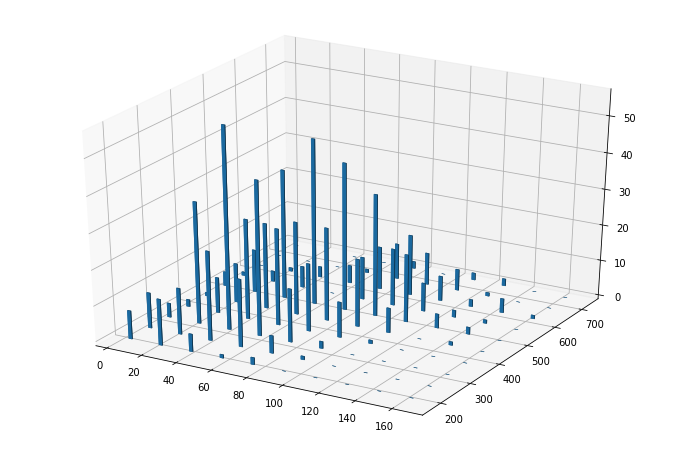

In [81]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(pokemon['Speed'], pokemon['Total']) #, range=[[0, 120], [0, 120]]
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
# Construct arrays with the dimensions for the 16 bars.
dx = dy = 2 * np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', shade=True)